<a href="https://www.rdkit.org/"><img src="https://img.shields.io/static/v1?label=Powered%20by&message=RDKit&color=3838ff&style=flat&logo=" align="left"/></a><br>

Walkthrough on reading, visualizing, manipulating molecules and their properties using Pandas and RDKit for Cheminformatics-related tasks. In this file we will be primarly using SMILES to describe the molecules of choice.

### What are SMILES? 

Simplified molecular input line entry system (SMILES) is a form of line notation for describing the structure of chemical species using text strings. More details can be found [here](https://www.daylight.com/meetings/summerschool98/course/dave/smiles-intro.html#TOC)

### Other resources:

1. Nice low-barrier intro to using some basic functions in RDkit: [Xinhao Lin's RDKit Cheatsheet](https://xinhaoli74.github.io/posts/2020/04/RDKit-Cheatsheet/), I've adopted some of the functions frrom that blog in here: 
2. [Rdkit Tutorial github](https://github.com/suneelbvs/rdkit_tutorials)
3. [Patrick Walters' Learning Cheminformatics Post](https://github.com/PatWalters/Learning_Cheminformatics)
4. [Getting Started RDKit Official Blog](https://github.com/rdkit/rdkit-orig/blob/master/Docs/Book/GettingStartedInPython.rst)

* [Video walkthrough tutorial on RDKit by Jan Jensen @ University of Copanhagen](https://sites.google.com/view/ml-basics/dealing-with-molecules)

Compilation of various recipes submitted by the community:
* [RDkit Cookbook](https://www.rdkit.org/docs/Cookbook.html)

## Install necessary modules 

In [1]:
# collapse_output
# Install requirements for the tutorial
!pip install pandas rdkit-pypi mols2grid matplotlib scikit-learn ipywidgets

In [1]:
import os 
import pandas as pd
import numpy as np 

The majority of the basic molecular functionality is found in module `rdkit.Chem`

In [2]:
# RDkit imports
import rdkit
from rdkit import Chem #This gives us most of RDkits's functionality
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
IPythonConsole.ipython_useSVG=True  #SVG's tend to look nicer than the png counterparts
print(rdkit.__version__)

# Mute all errors except critical
Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

2021.09.2


In [3]:
#----- PLOTTING PARAMS ----# 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plot_params = {
'font.size' : 15,
'axes.titlesize' : 15,
'axes.labelsize' : 15,
'axes.labelweight' : 'bold',
'xtick.labelsize' : 12,
'ytick.labelsize' : 12,
}
 
plt.rcParams.update(plot_params)

## Basics

In [4]:
# Beneze molecule using SMILES representation
mol = Chem.MolFromSmiles("c1ccccc1")

`mol` is a special type of `RDkit` object 

In [5]:
type(mol)

rdkit.Chem.rdchem.Mol

To display the molecule:

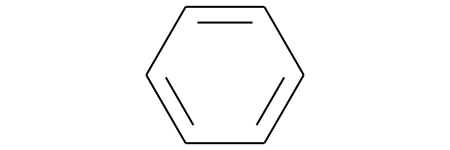

In [6]:
mol

By default SMILES (atleast the ones we deal with RDkit) accounts `H` atoms connected with `C` atoms implicitly based on the valence of the bond. You can add `H` explicitly using the command below: 

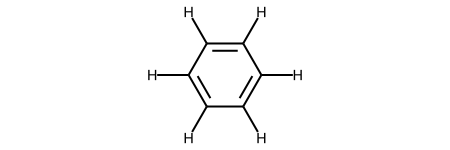

In [7]:
Chem.AddHs(mol)

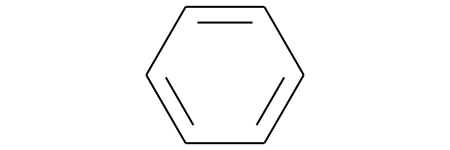

In [8]:
Chem.RemoveHs(mol)

In [9]:
# Convenience function to get atom index
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

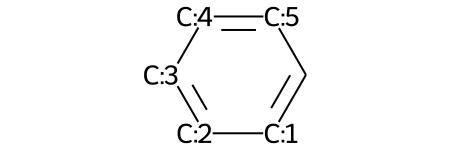

In [10]:
# With atom index
mol_with_atom_index(mol)

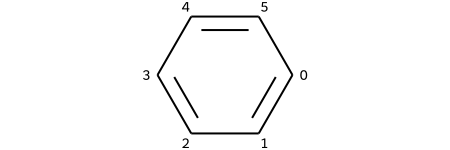

In [11]:
# Another option using in-built index for atoms 
IPythonConsole.drawOptions.addAtomIndices = True
mol = Chem.MolFromSmiles("c1ccccc1")
mol

### Descriptors for molecules

We can find more information about the molecule using `rdkit.Chem.Descriptors` : More information [here](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)

In [13]:
from rdkit.Chem import Descriptors

In [14]:
# To get molecular weight
mol_wt = Descriptors.ExactMolWt(mol)
print('Mol Wt: {:0.3f}'.format(mol_wt))

Mol Wt: 78.047


In [15]:
# To get heavy atom weight, this ignore H atoms 
heavy_mol_wt = Descriptors.HeavyAtomMolWt(mol)
print('Heavy Mol Wt: {:0.3f}'.format(heavy_mol_wt))

Heavy Mol Wt: 72.066


In [16]:
# To get number of rings 
ring_count = Descriptors.RingCount(mol)
print('Number of rings: {:0.3f}'.format(ring_count))

Number of rings: 1.000


In [17]:
# To get number of rotational bonds 
rotatable_bonds = Descriptors.NumRotatableBonds(mol)
print('Number of rotatable bonds: {:0.3f}'.format(rotatable_bonds))

Number of rotatable bonds: 0.000


In [18]:
# To get number of rings 
num_aromatic_rings = Descriptors.NumAromaticRings(mol)
print('Number of aromatic rings: {:0.3f}'.format(num_aromatic_rings))

Number of aromatic rings: 1.000


Get some more information about the molecule:

`MolToMolBlock`: To get Coordinates and bonding details for the molecule. More details on this file type can be found [here](https://en.wikipedia.org/wiki/Chemical_table_file)

In [19]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



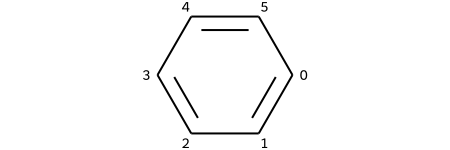

In [12]:
mol

## Little more on the molecule drawing 

Additional discussion on different ways to represnt and draw molecules in RDkit. This section will work in RDkit version > 2020.03.

I am following the code introduced in the official RDkit [blogpost](http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html)

* Nice example found on Pen's [blogpost](https://iwatobipen.wordpress.com/2020/05/01/draw-molecules-as-svg-in-horizontal-layout-drawing-rdkit-memo/)

In [13]:
from collections import defaultdict
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

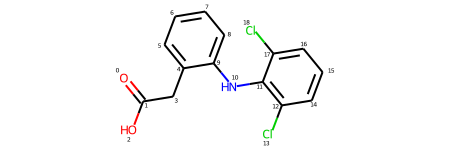

In [14]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
diclofenac

### Substructure highlights: 

Let's look at the the C=O and the -NH species in the molecule

In [15]:
# Code from : https://www.rdkit.org/docs/GettingStartedInPython.html?highlight=maccs#drawing-molecules
sub_pattern = Chem.MolFromSmarts('O=CCccN')
hit_ats = list(diclofenac.GetSubstructMatch(sub_pattern))
hit_bonds = []

for bond in sub_pattern.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    
    hit_bonds.append( diclofenac.GetBondBetweenAtoms(aid1, aid2).GetIdx() )

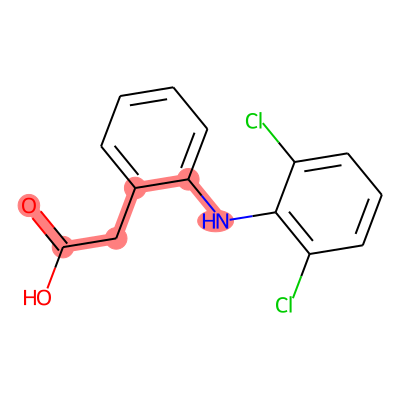

In [16]:
d2d = rdMolDraw2D.MolDraw2DSVG(400, 400) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d2d, diclofenac, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

Specify individual color and bonds

In [17]:
rings = diclofenac.GetRingInfo()
type(rings)

rdkit.Chem.rdchem.RingInfo

In [18]:
# Code from: http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html
    
colors = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

athighlights = defaultdict(list)
arads = {}

for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        bndhighlights[bid].append(colors[i])

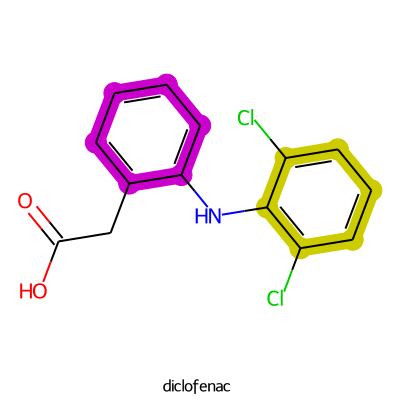

In [19]:
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(diclofenac,'diclofenac',dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## Reading dataset of molecules from a csv file

Here we will use Pandas, RDkit to make molecule object for the small sample of molecules. 

## Sample data

In [20]:
sample_df = pd.read_csv('https://raw.githubusercontent.com/pgg1610/data_files/main/simple_sample_molecules.csv',  sep=',')

In [21]:
sample_df.head(5)

,Name,SMILE
0,Cyclopropane,C1CC1
1,Ethylene,C=C
2,Methane,C
3,t-Butanol,CC(C)(C)O
4,ethane,CC


In [22]:
sample_df.shape

(115, 2)

In [23]:
# Adding to Pandas dataframe
from rdkit.Chem import PandasTools

`PandasTools` module helps add `mol` molecule objects from RDKit as per the SMILES in the dataframe

In [24]:
PandasTools.AddMoleculeColumnToFrame(sample_df, smilesCol='SMILE')

Check the new `ROMol` columns being appended in the dataframe

In [25]:
sample_df.columns

Index(['Name', 'SMILE', 'ROMol'], dtype='object')

,Name,SMILE,ROMol
0,Cyclopropane,C1CC1,

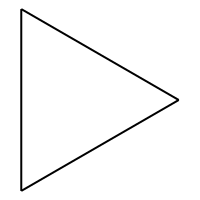

In [26]:
sample_df.head(1)

Visualize the dataframe, add properties of interest at the bottom, you can add index too if need

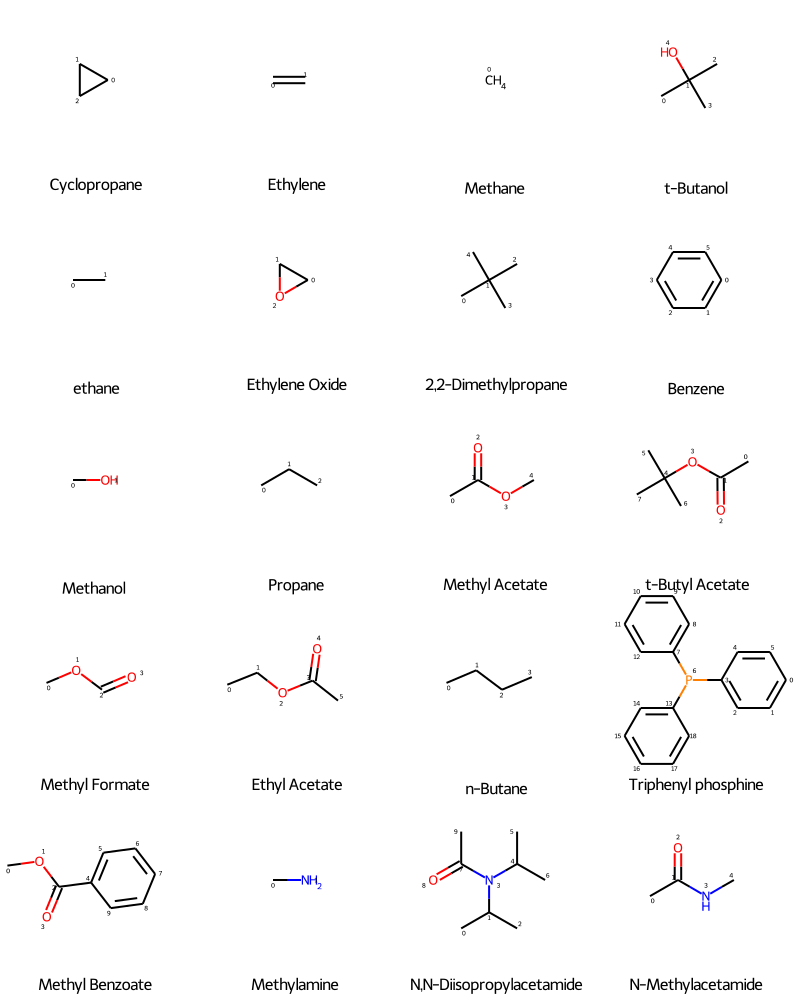

In [27]:
PandasTools.FrameToGridImage(sample_df[:20], legendsCol='Name', molsPerRow=4)

#### Quickly sort / search the dataset using a substructure search 

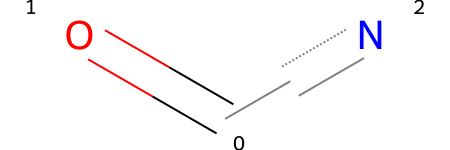

In [66]:
sub_pattern_to_match = Chem.MolFromSmarts('C(=O)N')
sub_pattern_to_match

In [69]:
match_df = pd.DataFrame()
for index, row in sample_df.iterrows():
    mol = Chem.MolFromSmiles(row['SMILE'])
    mol_sub_match = mol.HasSubstructMatch(sub_pattern_to_match)
    if mol_sub_match == True: 
        match_df = match_df.append(row)

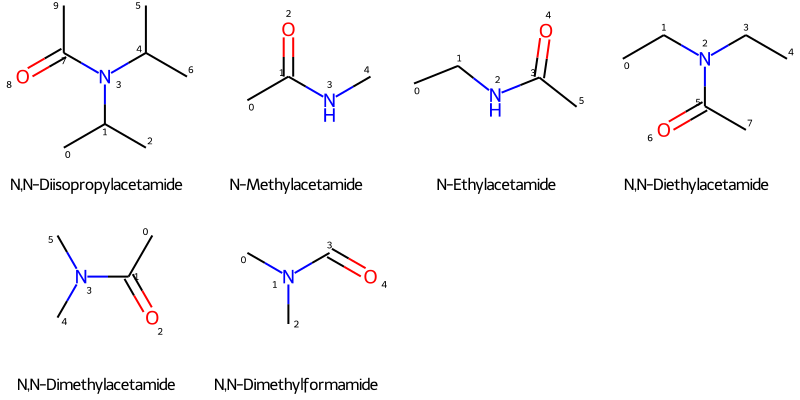

In [71]:
PandasTools.FrameToGridImage(match_df, legendsCol='Name', molsPerRow=4)

### LogP Dataset 

(From [Wikipedia](https://en.wikipedia.org/wiki/Partition_coefficient?oldformat=true))
The partition coefficient, abbreviated **P**, is defined as the ratio of the concentrations of a solute between two immisible solvents at equilibrium. Most commonly, one of the solvents is water, while the second is hydrophobic, such as 1-octanol.  
  
$$\log P_\text{oct/wat} = \log\left(\frac{\big[\text{solute}\big]_\text{octanol}^\text{un-ionized}}{\big[\text{solute}\big]_\text{water}^\text{un-ionized}}\right)$$

Hence the partition coefficient measures how hydrophilic ("water-loving") or hydrophobic ("water-fearing") a chemical substance is. Partition coefficients are useful in estimating the distribution of drugs within the body. Hydrophobic drugs with high octanol-water partition coefficients are mainly distributed to hydrophobic areas such as lipid bilayers of cells. Conversely, hydrophilic drugs (low octanol/water partition coefficients) are found primarily in aqueous regions such as blood serum.

The dataset used in this notebook is obtained from [Kaggle](https://www.kaggle.com/matthewmasters/chemical-structure-and-logp). This dataset features relatively simple molecules along with their LogP value. This is a synthetic dataset created using XLogP and does not contain experimental validation.

In [36]:
logP_df = pd.read_csv('https://raw.githubusercontent.com/pgg1610/data_files/main/logP_dataset.csv', sep=',', header=None, names=['SMILES', 'LogP'])

In [37]:
logP_df.head(5)

,SMILES,LogP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0
4,CCCOCCP,0.6


In [38]:
logP_df.shape

(14610, 2)

### Visualize the SMILE string 

In [39]:
mol_temp = logP_df.iloc[420]

In [40]:
mol_temp

SMILES    [2H][C]([2H])[Cl+]Cl
LogP                       1.6
Name: 420, dtype: object

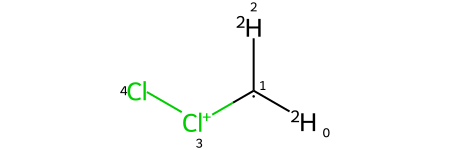

In [41]:
mol_obj = Chem.MolFromSmiles(mol_temp['SMILES'])
mol_obj

In [42]:
# To output x y z of the molecule 
print(Chem.MolToMolBlock(mol_obj))


     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  3  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 Cl  0  0  0  0  0  2  0  0  0  0  0  0
   -1.2990   -2.2500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
M  CHG  1   4   1
M  RAD  1   2   2
M  ISO  2   1   2   3   2
M  END



Take a small sample from QM9 dataset

In [43]:
logP_df_smol = logP_df.sample(20).reset_index(drop=True)

In [44]:
logP_df_smol.head(2)

,SMILES,LogP
0,C(CCCN)CCN,-0.2
1,CC(CF)CBr,2.1


In [45]:
logP_df_smol.shape

(20, 2)

`PandasTools` module helps add `mol` molecule objects from RDKit as per the SMILES in the dataframe

In [46]:
PandasTools.AddMoleculeColumnToFrame(logP_df_smol, smilesCol='SMILES')

Check the new `ROMol` columns being appended in the dataframe

In [47]:
logP_df_smol.columns

Index(['SMILES', 'LogP', 'ROMol'], dtype='object')

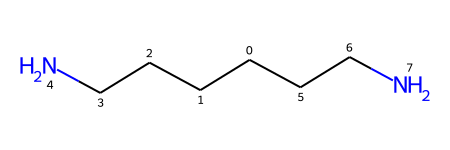

In [48]:
logP_df_smol['ROMol'][0]

Visualize the dataframe, add properties of interest at the bottom, you can add index too if need

In [49]:
import mols2grid 

In [50]:
#collapse_output
#mols2grid.display(logP_df_smol['ROMol'])

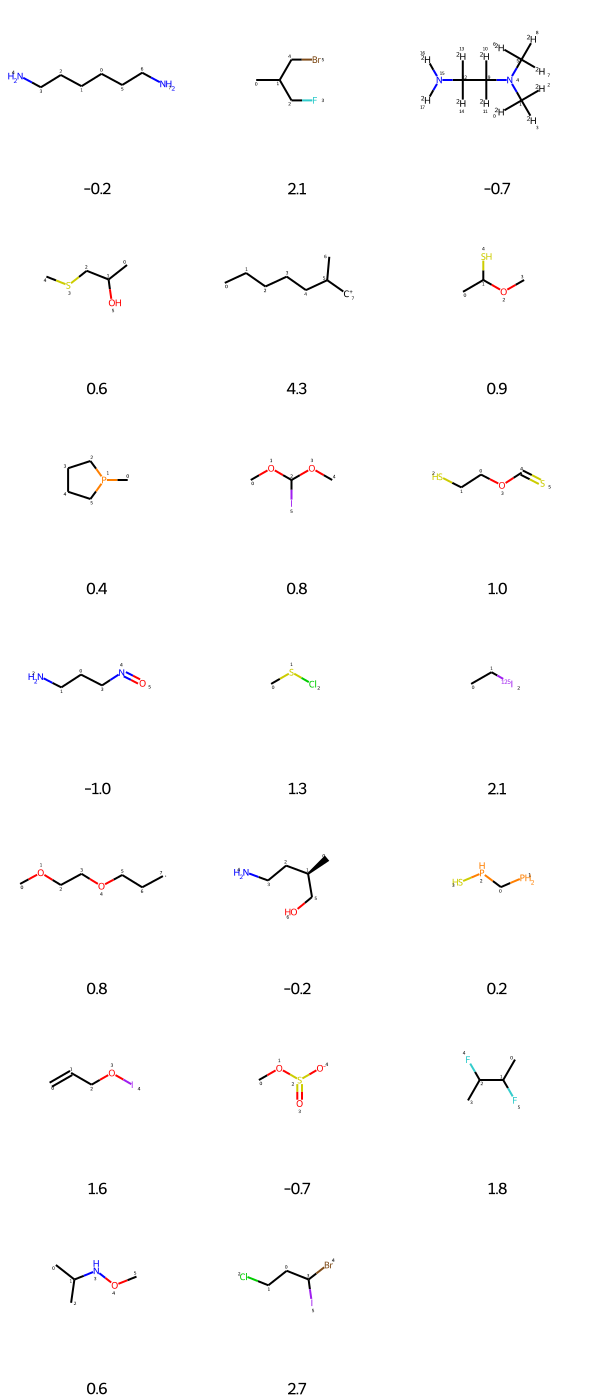

In [51]:
PandasTools.FrameToGridImage(logP_df_smol, legendsCol='LogP', molsPerRow=3, subImgSize=(200,200))

## Vanilla linear regression

Let's try building a model to predict a molecule's logP value given other descriptors. We will try simple molecular descriptors and check the performance. Some molecule discriptors we will consider: 
1. Molecular weight
2. Number of rotatable bonds 
3. Number of aromatic compounds 

In [52]:
logP_df.head(4)

,SMILES,LogP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0


As before we will first convert the SMILES string into a `rdkit.Chem.rdchem.Mol` object, let's write a convenience function to do so

In [53]:
# Getting count of aromatic elements 
_count = 0
for i in range(mol.GetNumAtoms()):
    if mol.GetAtomWithIdx(i).GetIsAromatic():
        _count = _count + 1
print(_count)

6


In [54]:
def generate_variables(smiles_list):
    
    variable_array = {'SMILES':[], 'ROMol':[], 'Mol_Wt':[],'Num_Aromatic_rings':[], 'Num_rotate_bonds':[], 'Ratio_Aromatic':[], 'Valence_electrons':[]} 
    
    for smile_entry in smiles_list: 
        mol_object = Chem.MolFromSmiles(smile_entry)
        
        mol_wt = Descriptors.MolWt(mol_object)
        mol_aromatic_rings = Descriptors.NumAromaticRings(mol_object)
        mol_rotatable_bonds = Descriptors.NumRotatableBonds(mol_object)
        
        # Calculate % of aromatic atoms in the compd
        mol_num_heavy_atom = Descriptors.HeavyAtomCount(mol_object)
        
        _count_aromatic = 0 
        for i in range(mol_object.GetNumAtoms()):
            if mol_object.GetAtomWithIdx(i).GetIsAromatic() == True:
                _count_aromatic = _count_aromatic + 1 
        
        mol_aromatic_ratio = _count_aromatic / mol_num_heavy_atom
        
        mol_val_electrons = Descriptors.NumValenceElectrons(mol_object)
        
        variable_array['SMILES'].append(smile_entry)
        variable_array['ROMol'].append(mol_object)
        variable_array['Mol_Wt'].append(mol_wt)
        variable_array['Num_Aromatic_rings'].append(mol_aromatic_rings)
        variable_array['Num_rotate_bonds'].append(mol_rotatable_bonds)
        variable_array['Ratio_Aromatic'].append(mol_aromatic_ratio)
        variable_array['Valence_electrons'].append(mol_val_electrons)
        
    return variable_array

### Look at a subset from the total logP data

In [55]:
logP_df.shape

(14610, 2)

In [56]:
# Look at random 10_000 entries to keep the analysis tractable 
df_10k = logP_df.sample(10_000, random_state=42)

In [57]:
variable_dict = generate_variables(df_10k.SMILES)
variable_df = pd.DataFrame(variable_dict, columns=variable_dict.keys())

,SMILES,LogP,ROMol,Mol_Wt,Num_Aromatic_rings,Num_rotate_bonds,Ratio_Aromatic,Valence_electrons
0,CNCSC,0.5,,91.179,0,2,0.0,32
1,CNCSC=C,1.0,,103.190,0,3,0.0,36

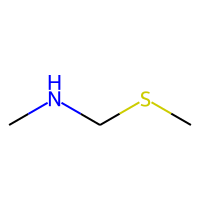
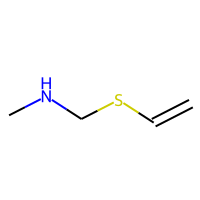

In [58]:
df_var_10k = df_10k.merge(variable_df, on='SMILES')
df_var_10k.head(2)

### Setup model 

In [59]:
df_var_10k.columns

Index(['SMILES', 'LogP', 'ROMol', 'Mol_Wt', 'Num_Aromatic_rings',
       'Num_rotate_bonds', 'Ratio_Aromatic', 'Valence_electrons'],
      dtype='object')

/var/folders/_r/6hhq_8ps5118p6sqqz231j480000gq/T/ipykernel_26421/2485801931.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_var_10k.hist(ax = ax);


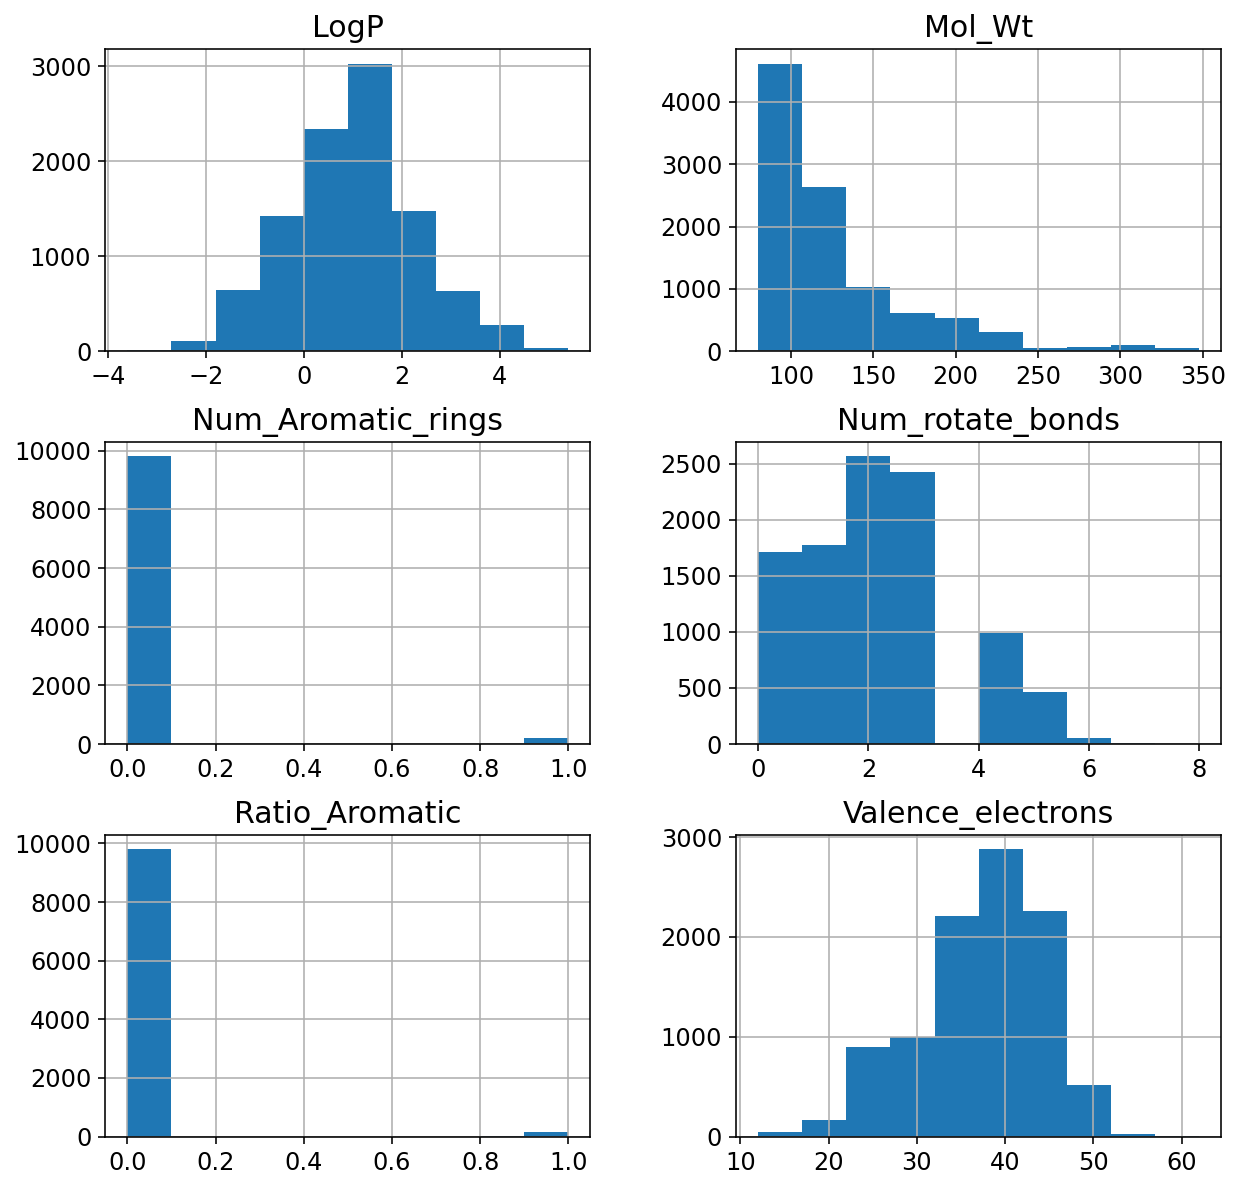

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
df_var_10k.hist(ax = ax);

Split into train and validation set

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_var_10k, test_size=0.3, random_state=42)

In [62]:
print(df_train.shape, df_test.shape)

(7000, 8) (3000, 8)


Drop some columns that arent that useful for prediction

In [63]:
X_train = df_train.drop(columns = ['LogP','ROMol','SMILES', 'Ratio_Aromatic', 'Num_Aromatic_rings']).values
y_train = df_train.LogP.values

Pre-process input data to normalize the scale of the descriptors 

In [64]:
# Standard Scaling X
std_scaler_X = StandardScaler()
X_train_std = std_scaler_X.fit_transform(X_train)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [67]:
# predict use the trained model -- we are still using training set here 
y_pred = model.predict(X_train_std)

Text(0, 0.5, 'Predicted')

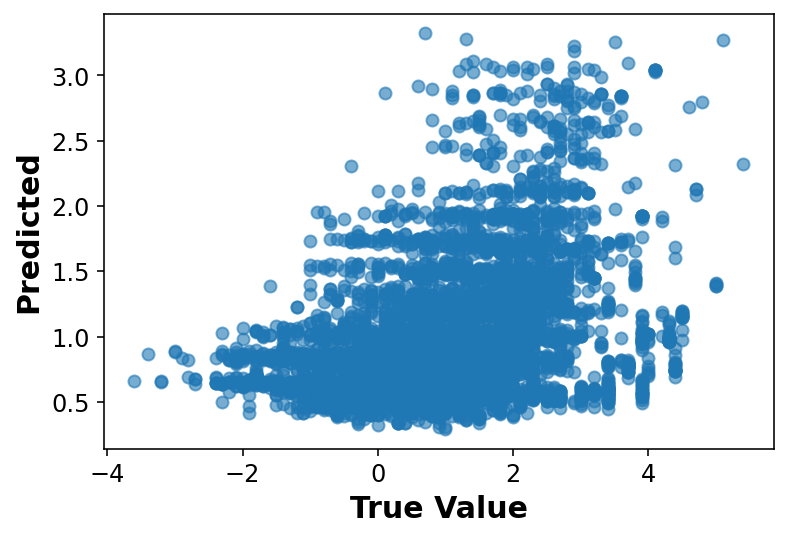

In [68]:
plt.scatter(y_train, y_pred, alpha=0.6)
plt.xlabel('True Value')
plt.ylabel('Predicted')

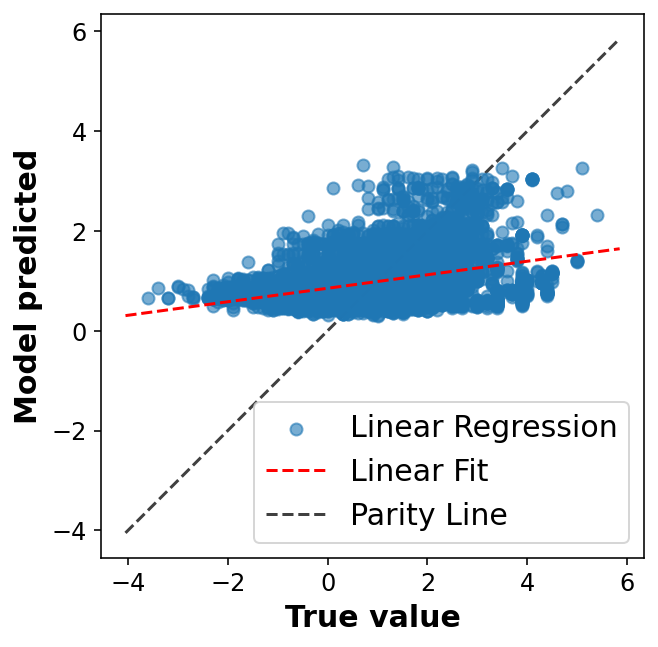

In [69]:
# Fancier looking plot 
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

### Evaluate model success
One of the simplest ways we can evaluate the success of a linear model is using the coefficient of determination (R<sup>2</sup>) which compares the variation in y alone to the variation remaining after we fit a model. Another way of thinking about it is comparing our fit line with the model that just predicts the mean of y for any value of x.

Another common practice is to look at a plot of the residuals to evaluate our ansatz that the errors were normally distributed.

In practice, now that we have seen some results, we should move on to try and improve the model. We won't do that here, but know that your work isn't done after your first model (especially one as cruddy as this one). It's only just begun!

**Calculate R<sup>2</sup> using:**
$$R^2 =1 -  \frac{\sum (y_i - \hat{y})^2}{\sum (y_i - \bar{y})^2}$$

In [70]:
# R2 score evaluation
SS_residuals = np.sum( (y_train - y_pred)**2 ) 
SS_total = np.sum( (y_train - np.mean(y_train))**2 )
r2 = 1 - SS_residuals / SS_total
print(r2)

0.13532814881109834


In [71]:
from sklearn.metrics import r2_score
print('R2 score: {}'.format(r2_score(y_train, y_pred)))

R2 score: 0.13532814881109834


## Using ensemble-based model

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model = RandomForestRegressor()
model.fit(X_train_std, y_train)

RandomForestRegressor()

In [74]:
y_pred = model.predict(X_train_std)

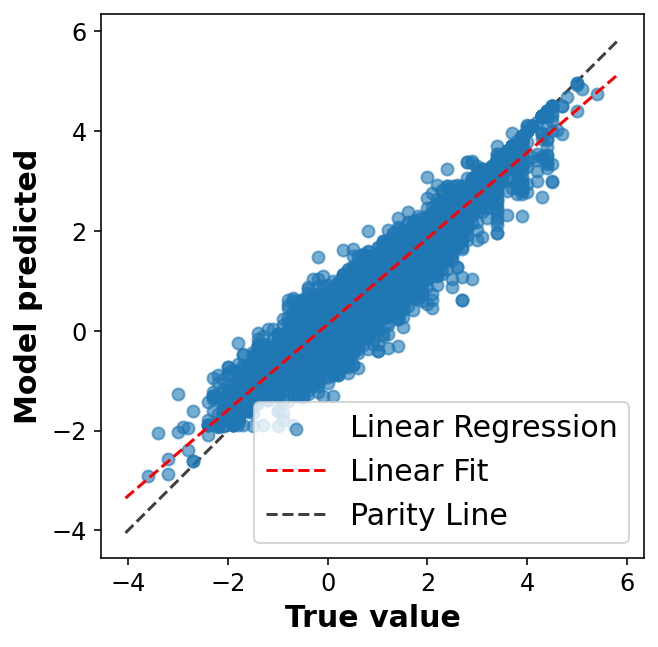

In [75]:
# Fancier looking plot 
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

In [76]:
def display_performance(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print('R2: {0:0.2f}\n'
          'MAE: {1:0.2f}\n'
          'RMSE: {2:0.2f}'.format(r2, mae, rmse))
    return(r2, mae, rmse)

In [77]:
display_performance(y_train,y_pred);

R2: 0.91
MAE: 0.29
RMSE: 0.40


## Fingerprints

Compress molecules into vectors for mathetical operations and comparisons. First we will look at `MorganFingerprint` method. For this method we have to define the radius and the size of the vector being used. 

More information on different Circular Fingerprints can be read at this [blogpost](https://depth-first.com/articles/2019/01/11/extended-connectivity-fingerprints/). **Highly recommended**

* [Presentation by Gregory Landrum (creator of RDkit) on Fingerprints](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf)

* [RDkit Blog entry of visualizing the fingerprint bitvectors](http://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html). Using the new fingerprint bit rendering code


In [78]:
# Fingerprints
from rdkit.Chem import AllChem

In [79]:
radius = 2 # How far from the center node should we look at? 
ecfp_power = 10 # Size of the fingerprint vectors  
ECFP = [ np.array(AllChem.GetMorganFingerprintAsBitVect(m, radius, nBits = 2**ecfp_power)) for m in df_train['ROMol'] ]

In [80]:
len(ECFP)

7000

In [81]:
df_train['ECFP'] = ECFP

,SMILES,LogP,ROMol,Mol_Wt,Num_Aromatic_rings,Num_rotate_bonds,Ratio_Aromatic,Valence_electrons,ECFP
6160,C[NH+](C)CCl,1.0,,94.565,0,1,0.0,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1564,CCCNCO,0.1,,89.138,0,3,0.0,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

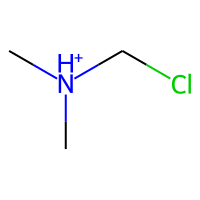
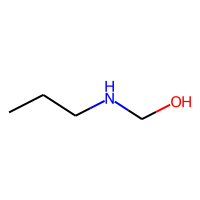

In [82]:
df_train.sample(2)

In [83]:
X_train = df_train.ECFP.values
X_train = np.stack(X_train, axis=0)

y_train = df_train.LogP.values

In [84]:
# Standard Scaling
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)

In [85]:
model = RandomForestRegressor()
model.fit(X_train_std, y_train)

RandomForestRegressor()

In [86]:
y_pred = model.predict(X_train_std)

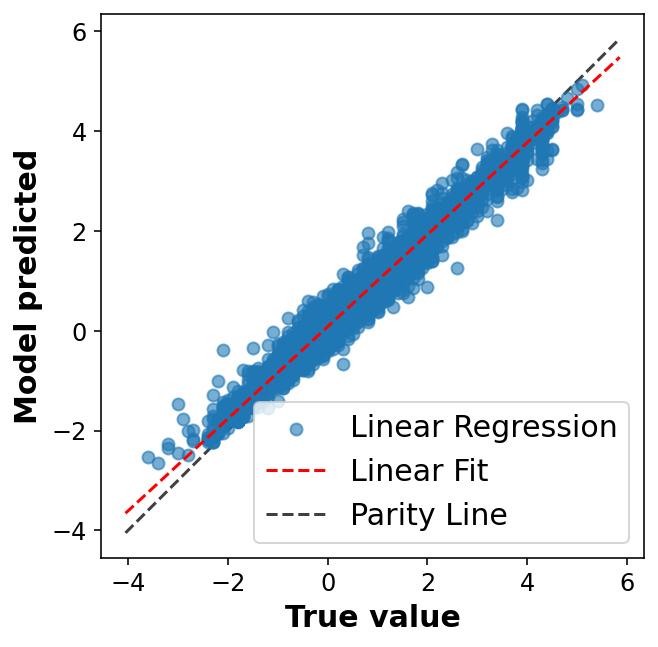

In [87]:
# Fancier looking plot 
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

In [88]:
display_performance(y_train,y_pred);

R2: 0.97
MAE: 0.15
RMSE: 0.22


## Similarity
RDKit provides tools for different kinds of similarity search, including Tanimoto, Dice, Cosine, Sokal, Russel… and more. Tanimoto is a very widely use similarity search metric because it incorporates substructure matching. Here is an example

In [89]:
ref_mol = df_var_10k.iloc[4234]['ROMol']

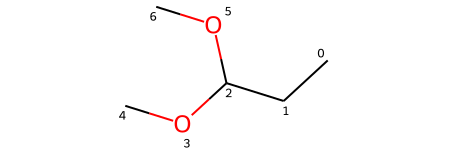

In [90]:
ref_mol

In [91]:
# Generate finger print based representation for that molecule 
ref_ECFP4_fps = AllChem.GetMorganFingerprintAsBitVect(ref_mol, radius=2)

In [92]:
df_var_10k_ECFP4_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in df_var_10k['ROMol']]

Estimate the similarity of the molecules in the dataset to the reference dataset, there are multiple ways of doing it: we are using Tanimoto fingerprints 

In [93]:
from rdkit import DataStructs
similarity_efcp4 = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps, x) for x in df_var_10k_ECFP4_fps]

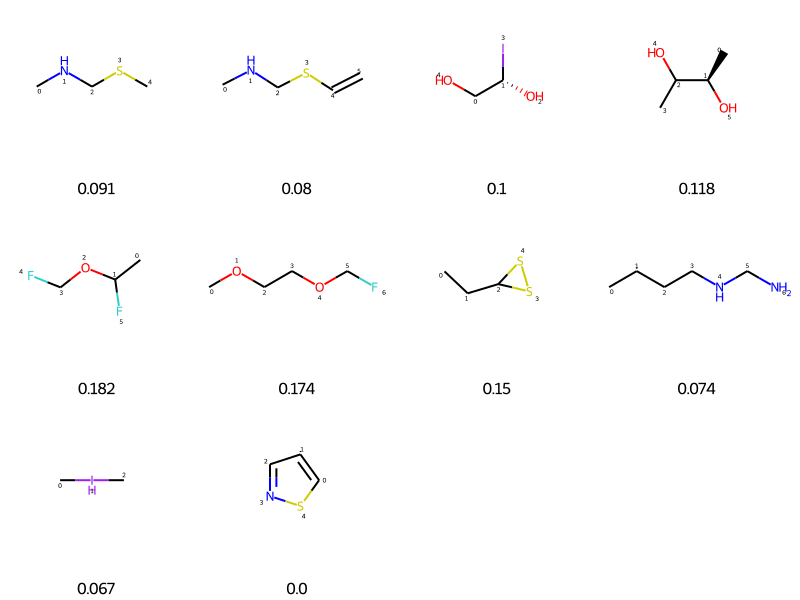

In [94]:
df_var_10k['Tanimoto_Similarity (ECFP4)'] = similarity_efcp4
df_var_10k['Tanimoto_Similarity (ECFP4)'] = df_var_10k['Tanimoto_Similarity (ECFP4)'].round(3)
PandasTools.FrameToGridImage(df_var_10k[:10], legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)

Sorting the molecule similarity for clarity:

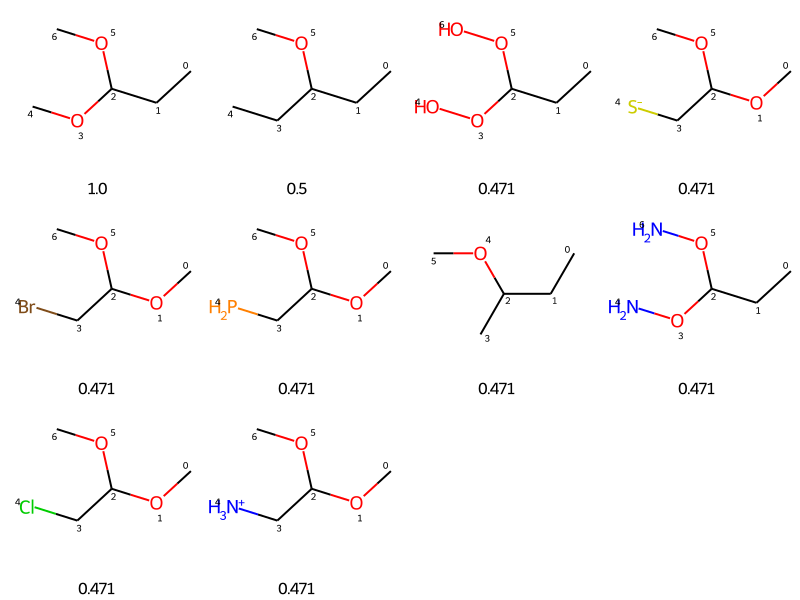

In [95]:
df_var_10k = df_var_10k.sort_values(['Tanimoto_Similarity (ECFP4)'], ascending=False)
PandasTools.FrameToGridImage(df_var_10k[:10], legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)